## Generate Theory Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt, numpy as np
from scipy.interpolate import spline
from math import pi #import pi function for simple reference
#from math import exp

In [2]:
def GetPermeability(T2,Pm1,Ep):
    #print("Temperature = ",T2)
    R = 8.3144*0.001
    K = 273.15
    T1 = 25
    Pm2 = Pm1*np.exp((Ep/R) *((1 / (T1 + K)) - (1 / (T2 + K))))
    return Pm2

In [3]:
T = [30,40,50,60]
Permeability_AIR=np.empty((len(T), 0)).tolist()
Pm2_Oxygen=np.empty((len(T), 0)).tolist()
Pm2_Nitrogen=np.empty((len(T), 0)).tolist()
Ep_Oxygen = 42.7 #Activation energy of Oxygen
Ep_Nitrogen = 49.4 #Activation energy of Nitrogen
Pm1_Oxygen = 2.2 #Permeability with reference temperature = 25'C
Pm1_Nitrogen = 0.73 #Permeability with reference temperature = 25'C
for i in range(len(T)):
    Pm2_Oxygen[i]=GetPermeability(T[i],Pm1_Oxygen,Ep_Oxygen)
    print('Pm2_Oxygen=',Pm2_Oxygen[i])
    Pm2_Nitrogen[i]=GetPermeability(T[i],Pm1_Nitrogen,Ep_Nitrogen)
    print('Pm2_Nitrogen=',Pm2_Nitrogen[i])
    Permeability_AIR[i] = (0.2*np.array(Pm2_Oxygen[i])) + (0.8*np.array(Pm2_Nitrogen[i]))
    i+=1
print("Permeability of AIR:","\n",Permeability_AIR)

Pm2_Oxygen= 2.92285111346
Pm2_Nitrogen= 1.01406756848
Pm2_Oxygen= 5.02058633578
Pm2_Nitrogen= 1.89618181405
Pm2_Oxygen= 8.33990475406
Pm2_Nitrogen= 3.41091063741
Pm2_Oxygen= 13.4380442043
Pm2_Nitrogen= 5.92315182355
Permeability of AIR: 
 [1.3958242774771832, 2.5210627183965526, 4.396709460737446, 7.4261302996964398]


In [4]:
Permeability_TEST = [1.88,3.161,5.755,9.024]

In [19]:
#Create Figures
def CreateGraphs(T, Pm,i):
    labels = ['Theory','Experimental']
    colours = ['b','r']
    axis_font = {'size':'12'} #customize graph
    plt.ylabel("Permeability (barrer)",**axis_font),plt.xlabel("Temperature",**axis_font) #name axes
    ax.scatter(T, Pm,c=colours[i], label=labels[i],s=6,edgecolor=colours[i]) #create a scatter plot
    plt.plot(np.unique(T),np.poly1d(np.polyfit(T, Pm, 2))(np.unique(T)),c=colours[i])
    return

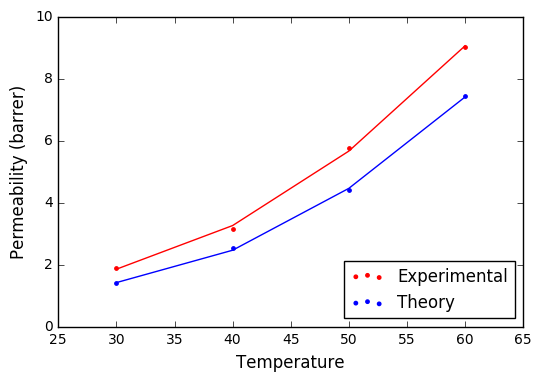

In [20]:
fig, ax = plt.subplots()
CreateGraphs(T, Permeability_TEST,1)
CreateGraphs(T, Permeability_AIR,0)
leg = ax.legend(loc=4)
plt.show() #show graph